# Loss vs. Similarity Score

- *Loss* refers to training loss (currently). Training loss is noise-contrastive estimation *hinge* loss.
- *Similarity score* refers to the mean similarity between studies in the same review minus the mean similarity between studies in different reviews. A similarity score > 0 indicates that studies in the same review are closer to each other than studies in different reviews!
    - For computing the similarity score, I'm sampling 128 pairs of studies. The first 64 are pairs of studies from the same review. The second 64 pairs are studies from different reviews. The similarity score is just the average similarity of the first 64 minus the average similarity of the second 64. We probably want to increase this number to increase the robustness of the estimate, but it seems to be working fine thus far!

This is currently with *outcome* summaries.

In [34]:
ls store/hyperparams/

big-k/       hinge/       little-k/    test/        unseen/
held-out/    large-epoch/ sgd/         top-k/


In [35]:
from curves import LearningCurveVisualizer

lv = LearningCurveVisualizer(exp_group='unseen', metric='similarity_score', mode='max')

lv.best_runs()

,best_mu,best,worst,best_epoch,callbacks,exp-group,nb-data,nb-epoch,reg
exp-id,,,,,,,,,
1,0.400681,0.400681,0.400681,9,"cb,ss,sl,fl,cv",unseen,0.0116666666667,32,1e-06
2,0.374148,0.374148,0.374148,11,"cb,ss,sl,fl,cv",unseen,0.0133333333333,32,1e-06
0,0.294567,0.294567,0.294567,14,"cb,ss,sl,fl,cv",unseen,0.01,32,1e-06


The `best_mu` value refers to the model setting with the best training loss.

### Loss and Similarity Score

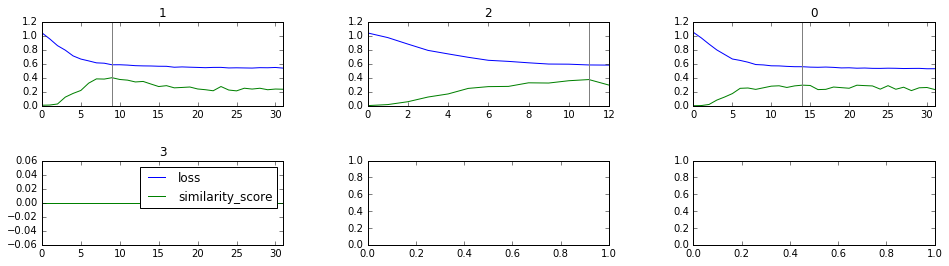

In [36]:
lv.plot_values(['loss', 'similarity_score'])